In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import numpy as np

In [2]:
image = mimg.imread('test.jpg')
print('This image is:',type(image), 'with dimension:',image.shape)

ysize = image.shape[0]
xsize = image.shape[1]

region_select = np.copy(image)

This image is: <class 'numpy.ndarray'> with dimension: (540, 960, 3)


In [3]:
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [400, 0]

In [4]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [5]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))


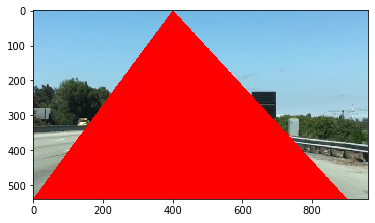

In [6]:
# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)

# uncomment if plot does not display
plt.show()